In [1]:
import pandas as pd

## 생활인구

In [2]:
data = pd.read_csv('data/서울시_자치구코드.csv',encoding='cp949')
data

,자치구 코드,자치구 명
0,11110,종로구
1,11140,중구
2,11170,용산구
3,11200,성동구
4,11215,광진구
5,11230,동대문구
6,11260,중랑구
7,11290,성북구
8,11305,강북구
9,11320,도봉구


In [3]:
people = pd.read_csv('data/2019_서울시생활인구.csv',encoding='cp949')
people

,기준일ID,시간대구분,자치구코드,총생활인구수,Male_15_19,Female_15_19
0,20190101,0,11110,247783.9476,6134.7190,6972.3215
1,20190101,0,11140,176516.2769,3251.4707,3218.1529
2,20190101,0,11170,287806.8492,5865.4531,5817.7849
3,20190101,0,11200,335106.5204,6766.7787,6667.5713
4,20190101,0,11215,399818.0269,12056.0837,11147.1235
...,...,...,...,...,...,...
211195,20191231,23,11620,512045.7410,10001.0660,9534.3179
211196,20191231,23,11650,507017.9562,15440.6841,16063.5392
211197,20191231,23,11680,701730.1925,22627.7125,22513.2926
211198,20191231,23,11710,776809.6518,21907.8004,21904.1499


In [4]:
people['people15_19']= people['Male_15_19']+people['Female_15_19']
people

,기준일ID,시간대구분,자치구코드,총생활인구수,Male_15_19,Female_15_19,people15_19
0,20190101,0,11110,247783.9476,6134.7190,6972.3215,13107.0405
1,20190101,0,11140,176516.2769,3251.4707,3218.1529,6469.6236
2,20190101,0,11170,287806.8492,5865.4531,5817.7849,11683.2380
3,20190101,0,11200,335106.5204,6766.7787,6667.5713,13434.3500
4,20190101,0,11215,399818.0269,12056.0837,11147.1235,23203.2072
...,...,...,...,...,...,...,...
211195,20191231,23,11620,512045.7410,10001.0660,9534.3179,19535.3839
211196,20191231,23,11650,507017.9562,15440.6841,16063.5392,31504.2233
211197,20191231,23,11680,701730.1925,22627.7125,22513.2926,45141.0051
211198,20191231,23,11710,776809.6518,21907.8004,21904.1499,43811.9503


In [5]:
a = people[['자치구코드','people15_19']].groupby('자치구코드').mean()
a

,people15_19
자치구코드,
11110,14461.928682
11140,8826.425424
11170,11975.596748
11200,15168.224143
11215,20683.043801
11230,18514.572581
11260,15817.655917
11290,26439.558921
11305,14017.194383


In [6]:
mm =pd.merge(data,a,left_on = '자치구 코드', right_on = '자치구코드')
mm = mm.drop(columns=['자치구 코드'], axis=1)
mm.head()

,자치구 명,people15_19
0,종로구,14461.928682
1,중구,8826.425424
2,용산구,11975.596748
3,성동구,15168.224143
4,광진구,20683.043801


In [7]:
mm = mm.rename({'자치구 명':'자치구'},axis=1)
mm

,자치구,people15_19
0,종로구,14461.928682
1,중구,8826.425424
2,용산구,11975.596748
3,성동구,15168.224143
4,광진구,20683.043801
5,동대문구,18514.572581
6,중랑구,15817.655917
7,성북구,26439.558921
8,강북구,14017.194383
9,도봉구,13895.089702


#### 기존데이터와 merge

In [8]:
new_data1=pd.read_csv('data/new_data1.csv')
new_data1

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계),대분류,주거환경,경제환경,사회환경,교육환경
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0,강남구,6.44,5.38,6.27,5.84
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0,강남구,6.44,5.38,6.27,5.84
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0,강남구,6.44,5.38,6.27,5.84
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0,동대문구,6.10,5.16,5.86,5.55
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0,동대문구,6.10,5.16,5.86,5.55
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0,동대문구,6.10,5.16,5.86,5.55
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0,동대문구,6.10,5.16,5.86,5.55


In [9]:
new_data2 = pd.merge(new_data1,mm,on='자치구', how ='left' )
new_data2

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계),대분류,주거환경,경제환경,사회환경,교육환경,people15_19
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0,강남구,6.44,5.38,6.27,5.84,45613.514389
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0,강남구,6.44,5.38,6.27,5.84,45613.514389
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0,강남구,6.44,5.38,6.27,5.84,45613.514389
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0,동대문구,6.10,5.16,5.86,5.55,18514.572581
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0,동대문구,6.10,5.16,5.86,5.55,18514.572581
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0,동대문구,6.10,5.16,5.86,5.55,18514.572581
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0,동대문구,6.10,5.16,5.86,5.55,18514.572581


In [10]:
new_data2.corr()

,학급수,학생수,학급당평균학생수,교원수,전입학생수(계),전출학생수(계),주거환경,경제환경,사회환경,교육환경,people15_19
학급수,1.000000,0.890153,0.299327,0.916006,0.298706,0.282048,0.122296,0.060798,0.196025,0.205587,0.271727
학생수,0.890153,1.000000,0.683150,0.763824,0.397949,0.329371,0.100465,0.065093,0.166947,0.166384,0.249010
학급당평균학생수,0.299327,0.683150,1.000000,0.177689,0.316112,0.231368,0.029224,0.043445,0.046514,0.036330,0.104894
교원수,0.916006,0.763824,0.177689,1.000000,0.210170,0.235530,0.128950,0.046981,0.182830,0.205253,0.268371
전입학생수(계),0.298706,0.397949,0.316112,0.210170,1.000000,0.382568,-0.002998,-0.013470,0.048100,0.101485,0.082603
전출학생수(계),0.282048,0.329371,0.231368,0.235530,0.382568,1.000000,-0.064346,-0.069136,-0.033821,0.049511,0.007766
주거환경,0.122296,0.100465,0.029224,0.128950,-0.002998,-0.064346,1.000000,0.544610,0.610195,0.371303,0.323578
경제환경,0.060798,0.065093,0.043445,0.046981,-0.013470,-0.069136,0.544610,1.000000,0.263616,0.217567,0.067397
사회환경,0.196025,0.166947,0.046514,0.182830,0.048100,-0.033821,0.610195,0.263616,1.000000,0.598433,0.628808
교육환경,0.205587,0.166384,0.036330,0.205253,0.101485,0.049511,0.371303,0.217567,0.598433,1.000000,0.401710


## 한부모가정,가구수

In [11]:
single_Parent= pd.read_csv('data/서울시_저소득_한부모가족_통계.csv',encoding='cp949')
single_Parent

,기간,자치구,한부모_가구수,한부모_가구원수
0,2019,종로구,367,855
1,2019,중구,365,815
2,2019,용산구,621,"1,333"
3,2019,성동구,804,"1,843"
4,2019,광진구,"1,191","2,818"
5,2019,동대문구,"1,157","2,709"
6,2019,중랑구,"2,295","5,413"
7,2019,성북구,"1,433","3,348"
8,2019,강북구,"1,962","4,573"
9,2019,도봉구,"1,664","3,927"


In [12]:
single_Parent =single_Parent.drop(columns=['기간'], axis=1)
single_Parent

,자치구,한부모_가구수,한부모_가구원수
0,종로구,367,855
1,중구,365,815
2,용산구,621,"1,333"
3,성동구,804,"1,843"
4,광진구,"1,191","2,818"
5,동대문구,"1,157","2,709"
6,중랑구,"2,295","5,413"
7,성북구,"1,433","3,348"
8,강북구,"1,962","4,573"
9,도봉구,"1,664","3,927"


- 기존 데이터와 merge

In [13]:
new_data3 = pd.merge(new_data2,single_Parent,on='자치구', how ='left' )
new_data3

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계),대분류,주거환경,경제환경,사회환경,교육환경,people15_19,한부모_가구수,한부모_가구원수
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294"
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294"
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294"
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294"
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709"
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709"
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709"
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709"


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic'

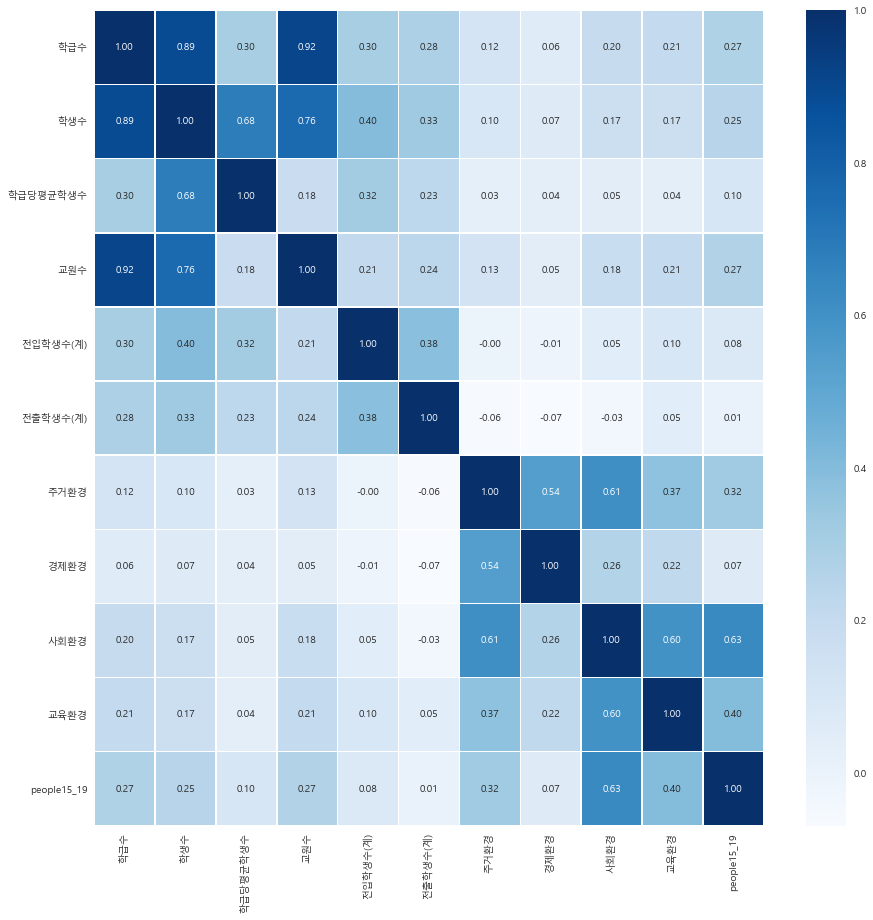

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data = new_data3.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 소득인식수준

In [17]:
income_level = pd.read_csv('data/서울시_소득인식수준_통계.csv',encoding='cp949')
income_level=income_level.drop(columns=['대분류'], axis=1)
income_level = income_level.rename({'분류':'자치구'},axis=1)
income_level

,자치구,저소득,중간,고소득
0,종로구,8.3,38.2,53.5
1,중구,32.6,35.2,32.2
2,용산구,24.1,52.7,23.2
3,성동구,19.6,47.1,33.3
4,광진구,23.9,53.1,23.0
5,동대문구,31.6,46.3,22.0
6,중랑구,16.0,58.5,25.6
7,성북구,11.8,49.3,38.8
8,강북구,23.6,52.9,23.4
9,도봉구,14.0,56.2,29.7


- 기존 파일과 소득수준 merge

In [18]:
new_data4 = pd.merge(new_data3,income_level, on='자치구')
new_data4

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,사설학원수,전입학생수(계),전출학생수(계),대분류,주거환경,경제환경,사회환경,교육환경,people15_19,한부모_가구수,한부모_가구원수,저소득,중간,고소득
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,"2,361",10.0,11.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,"2,361",36.0,27.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,"2,361",21.0,18.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,"2,361",0.0,5.0,강남구,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,350,33.0,20.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,350,5.0,7.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,350,4.0,18.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,350,16.0,6.0,동대문구,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0


- 변수중 학원수는 위배되는 칼럼인것 같아서 지우기, 대분류 중복칼럼 지우기
- people15_19 칼럼이름을 유동인구로 바꾸기
- 전출 전입 학생수 칼럼이름 수정하기

In [19]:
new_data4 = new_data4.drop(columns=['사설학원수','대분류'], axis=1)

new_data4 = new_data4.rename({'people15_19':'청소년유동인구', '전입학생수(계)':'전입학생수','전출학생수(계)':'전출학생수'},axis=1)
new_data4

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,10.0,11.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,36.0,27.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,21.0,18.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,33.0,20.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,5.0,7.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,4.0,18.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,16.0,6.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0


In [20]:
new_data4.to_csv('data/new_data4.csv',index=False)

## 학업중단자 수

In [21]:
stop_learning = pd.read_csv('data/서울시_고등학생_학업중단자수.csv',encoding='cp949')
stop_learning = stop_learning[['자치구','학업중단자수']]
stop_learning

,자치구,학업중단자수
0,종로구,190
1,중구,136
2,용산구,139
3,성동구,117
4,광진구,119
5,동대문구,145
6,중랑구,87
7,성북구,108
8,강북구,76
9,도봉구,123


- new_data4와 merge하기


In [22]:
new_data5 = pd.merge(new_data4,stop_learning,on ='자치구')
new_data5

,학교명,학급수,학생수,학급당평균학생수,교원수,자치구,전입학생수,전출학생수,주거환경,경제환경,사회환경,교육환경,청소년유동인구,한부모_가구수,한부모_가구원수,저소득,중간,고소득,학업중단자수
0,국립국악고등학교,15.0,442.0,29.466667,47.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7,405
1,개포고등학교,30.0,643.0,21.433333,72.0,강남구,10.0,11.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7,405
2,경기고등학교,45.0,1214.0,26.977778,101.0,강남구,36.0,27.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7,405
3,경기여자고등학교,43.0,1141.0,26.534884,98.0,강남구,21.0,18.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7,405
4,서울로봇고등학교,24.0,460.0,19.166667,76.0,강남구,0.0,5.0,6.44,5.38,6.27,5.84,45613.514389,973,"2,294",20.4,44.9,34.7,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,동국대학교사범대학부속고등학교,33.0,949.0,28.757576,73.0,동대문구,33.0,20.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0,145
316,정화여자상업고등학교,19.0,334.0,17.578947,43.0,동대문구,5.0,7.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0,145
317,해성국제컨벤션고등학교,27.0,635.0,23.518519,61.0,동대문구,4.0,18.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0,145
318,해성여자고등학교,27.0,673.0,24.925926,58.0,동대문구,16.0,6.0,6.10,5.16,5.86,5.55,18514.572581,"1,157","2,709",31.6,46.3,22.0,145


In [23]:
new_data5.to_csv('data/new_data5.csv',index=False)